In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# reset the options
pd.reset_option('display.max_rows')

# set the option to display the maximum number of columns
pd.set_option('display.max_columns', 20)

# set the option to display the maximum number of rows
pd.set_option('display.min_rows', 100)
pd.set_option('display.max_rows', 100)

pd.describe_option('display.max_rows')
pd.describe_option('display.max_columns')

display.max_rows : int
    If max_rows is exceeded, switch to truncate view. Depending on
    `large_repr`, objects are either centrally truncated or printed as
    a summary view. 'None' value means unlimited.

    In case python/IPython is running in a terminal and `large_repr`
    equals 'truncate' this can be set to 0 and pandas will auto-detect
    the height of the terminal and print a truncated object which fits
    the screen height. The IPython notebook, IPython qtconsole, or
    IDLE do not run in a terminal and hence it is not possible to do
    correct auto-detection.
    [default: 60] [currently: 100]
display.max_columns : int
    If max_cols is exceeded, switch to truncate view. Depending on
    `large_repr`, objects are either centrally truncated or printed as
    a summary view. 'None' value means unlimited.

    In case python/IPython is running in a terminal and `large_repr`
    equals 'truncate' this can be set to 0 and pandas will auto-detect
    the width of the te

In [3]:
pollution = pd.read_csv("../globalairpollution.csv")

In [4]:
pollution

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good
5,United States of America,Punta Gorda,54,Moderate,1,Good,14,Good,11,Good,54,Moderate
6,Germany,Puttlingen,62,Moderate,1,Good,35,Good,3,Good,62,Moderate
7,Belgium,Puurs,64,Moderate,1,Good,29,Good,7,Good,64,Moderate
8,Russian Federation,Pyatigorsk,54,Moderate,1,Good,41,Good,1,Good,54,Moderate
9,Egypt,Qalyub,142,Unhealthy for Sensitive Groups,3,Good,89,Moderate,9,Good,142,Unhealthy for Sensitive Groups


## Exploratory Data Analysis 

In [5]:
pollution.shape

(23463, 12)

In [6]:
pollution.describe()

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value
count,23463.000000,23463.000000,23463.000000,23463.000000,23463.000000
mean,72.010868,1.368367,35.193709,3.063334,68.519755
std,56.055220,1.832064,28.098723,5.254108,54.796443
min,6.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,1.000000,21.000000,0.000000,35.000000
50%,55.000000,1.000000,31.000000,1.000000,54.000000
75%,79.000000,1.000000,40.000000,4.000000,79.000000
max,500.000000,133.000000,235.000000,91.000000,500.000000


In [7]:
pollution["AQI Value"].unique

<bound method Series.unique of 0         51
1         41
2         66
3         34
4         22
5         54
6         62
7         64
8         54
9        142
10        68
11        41
12       158
13       158
14        83
15        59
16       154
17        55
18        72
19       161
20        28
21       118
22        33
23       150
24       154
25        81
26        67
27        62
28        31
29        56
30        77
31        44
32        30
33        30
34        79
35        34
36        51
37        77
38        61
39        32
40        64
41        29
42        51
43       247
44        45
45        36
46        81
47       124
48        72
49        55
        ... 
23413     46
23414    152
23415     58
23416     32
23417     53
23418     34
23419     34
23420     49
23421     34
23422     64
23423     37
23424     22
23425     38
23426     74
23427     20
23428     51
23429    181
23430     86
23431     84
23432     50
23433     50
23434     36
23435     62
23436  

In [8]:
pollution.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good


In [9]:
pollutioncolumns = pollution.columns

In [10]:
pollutioncolumns

Index(['Country', 'City', 'AQI Value', 'AQI Category', 'CO AQI Value',
       'CO AQI Category', 'Ozone AQI Value', 'Ozone AQI Category',
       'NO2 AQI Value', 'NO2 AQI Category', 'PM2.5 AQI Value',
       'PM2.5 AQI Category'],
      dtype='object')

In [11]:
pollution2 = pollution.drop(pollution.columns[4:10], axis=1)

In [12]:
pollution2.columns

Index(['Country', 'City', 'AQI Value', 'AQI Category', 'PM2.5 AQI Value',
       'PM2.5 AQI Category'],
      dtype='object')

In [13]:
pollution2

,Country,City,AQI Value,AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,51,Moderate,51,Moderate
1,Brazil,Presidente Dutra,41,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,66,Moderate
3,Poland,Przasnysz,34,Good,20,Good
4,France,Punaauia,22,Good,6,Good
5,United States of America,Punta Gorda,54,Moderate,54,Moderate
6,Germany,Puttlingen,62,Moderate,62,Moderate
7,Belgium,Puurs,64,Moderate,64,Moderate
8,Russian Federation,Pyatigorsk,54,Moderate,54,Moderate
9,Egypt,Qalyub,142,Unhealthy for Sensitive Groups,142,Unhealthy for Sensitive Groups


In [14]:
# group the data by Country and calculate the mean AQI Value for each group
grouped = pollution2.groupby('Country')['AQI Value'].mean()

# display the results
print(grouped)

Country
Afghanistan                                              95.959184
Albania                                                  68.250000
Algeria                                                  88.166667
Andorra                                                  29.333333
Angola                                                   83.925926
Argentina                                                28.235294
Armenia                                                  53.636364
Aruba                                                   163.000000
Australia                                                33.600000
Austria                                                  53.720588
Azerbaijan                                               58.763158
Bahrain                                                 188.000000
Bangladesh                                              113.462500
Barbados                                                 73.000000
Belarus                                               

In [15]:
# get the highest and lowest mean AQI values
highest_mean = grouped.max()
lowest_mean = grouped.min()

# display the results
print("Highest mean AQI value:", highest_mean)
print("Lowest mean AQI value:", lowest_mean)

Highest mean AQI value: 421.0
Lowest mean AQI value: 16.0


In [16]:
# group the data by Country and calculate the mean AQI Value for each group
grouped = pollution2.groupby('Country')['AQI Value'].mean()

# sort the data by AQI value and display the highest and lowest mean values
sorted_grouped = grouped.sort_values()
print("Lowest mean AQI value:\n", sorted_grouped.head(1))
print("Highest mean AQI value:\n", sorted_grouped.tail(1))

# display the countries and their corresponding mean AQI values
print("Countries and their mean AQI values:\n", sorted_grouped)

Lowest mean AQI value:
 Country
Palau    16.0
Name: AQI Value, dtype: float64
Highest mean AQI value:
 Country
Republic of Korea    421.0
Name: AQI Value, dtype: float64
Countries and their mean AQI values:
 Country
Palau                                                    16.000000
Solomon Islands                                          18.000000
Maldives                                                 19.000000
Iceland                                                  23.000000
Bolivia (Plurinational State of)                         23.787879
Papua New Guinea                                         24.866667
Seychelles                                               26.000000
Bhutan                                                   26.000000
Uruguay                                                  26.653846
Argentina                                                28.235294
Andorra                                                  29.333333
Vanuatu                                        

In [17]:
# calculate the correlation between AQI Value and PM2.5 AQI Value
corr = pollution2['AQI Value'].corr(pollution2['PM2.5 AQI Value'])

# display the correlation coefficient
print("Correlation coefficient between AQI Value and PM2.5 AQI Value:", corr)

Correlation coefficient between AQI Value and PM2.5 AQI Value: 0.9843265891583709


The correlation coefficient between AQI Value and PM2.5 AQI Value is 0.9843265891583712, which is very close to 1. This indicates a very strong positive correlation between these two variables. In other words, as the AQI Value increases, the PM2.5 AQI Value tends to increase as well, and vice versa.

This result is not surprising, as the PM2.5 AQI Value is a sub-component of the overall AQI Value, which is calculated based on a combination of different air pollutants. The PM2.5 AQI Value specifically measures the concentration of fine particulate matter in the air, which is a major contributor to air pollution and can have negative health effects.

Overall, this result highlights the importance of monitoring and controlling the levels of fine particulate matter in the air, as it is closely linked to the overall air quality and can have significant impacts on public health.

In [18]:
#sorted_grouped

In [19]:
# sort the data by AQI value
sorted_grouped = grouped.sort_values()

# plot the top 10 and bottom 10 countries by their mean AQI values
bottom = sorted_grouped.tail(10)
top = sorted_grouped.head(10)

In [20]:
top

Country
Palau                               16.000000
Solomon Islands                     18.000000
Maldives                            19.000000
Iceland                             23.000000
Bolivia (Plurinational State of)    23.787879
Papua New Guinea                    24.866667
Seychelles                          26.000000
Bhutan                              26.000000
Uruguay                             26.653846
Argentina                           28.235294
Name: AQI Value, dtype: float64

In [21]:
bottom

Country
Senegal                 152.424242
India                   152.964228
Qatar                   157.500000
Kuwait                  162.000000
Aruba                   163.000000
United Arab Emirates    163.666667
Pakistan                178.788274
Mauritania              179.000000
Bahrain                 188.000000
Republic of Korea       421.000000
Name: AQI Value, dtype: float64

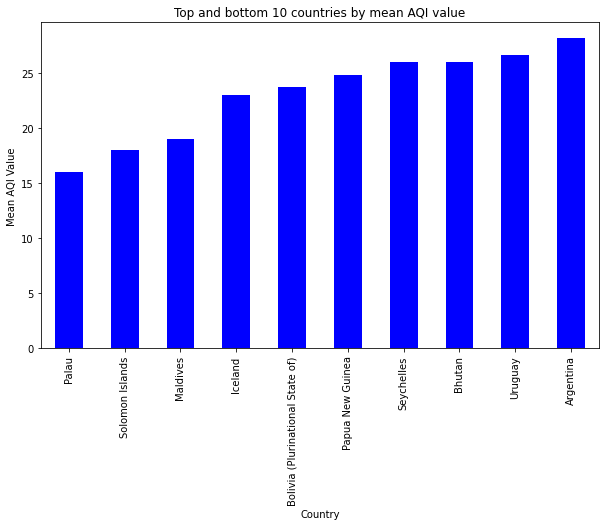

In [22]:
# add labels and a title to the plot
plt.xlabel('Country')
plt.ylabel('Mean AQI Value')
plt.title('Top and bottom 10 countries by mean AQI value')

top.plot(kind='bar', figsize=(10,6), color='blue')

# bottom.plot(kind='bar', figsize=(10,6), color='purple')

# display the plot
plt.show()

<AxesSubplot: xlabel='Country'>

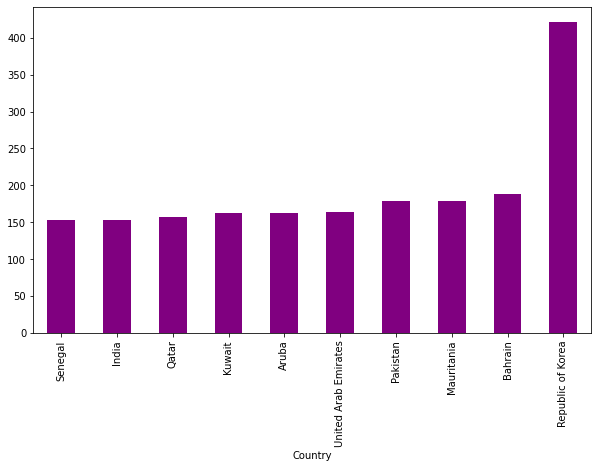

In [23]:
bottom.plot(kind='bar', figsize=(10,6), color='purple')

In [24]:
# Compute the correlation matrix
corr_matrix = pollution.corr()
# Print the correlation matrix
print(corr_matrix)

                 AQI Value  CO AQI Value  Ozone AQI Value  NO2 AQI Value  \
AQI Value         1.000000      0.430602         0.405310       0.231758   
CO AQI Value      0.430602      1.000000         0.145724       0.488092   
Ozone AQI Value   0.405310      0.145724         1.000000      -0.181818   
NO2 AQI Value     0.231758      0.488092        -0.181818       1.000000   
PM2.5 AQI Value   0.984327      0.438557         0.339887       0.260127   

                 PM2.5 AQI Value  
AQI Value               0.984327  
CO AQI Value            0.438557  
Ozone AQI Value         0.339887  
NO2 AQI Value           0.260127  
PM2.5 AQI Value         1.000000  


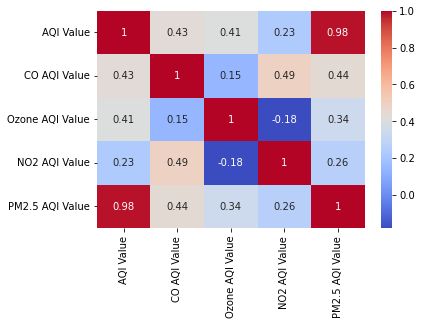

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Create a heatmap using seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
# Show the plot
plt.show()

#### We will be creating a linear regression model to predict aqi values using carbon and pm2.5 since there is a high correlation

In [26]:
import pandas as pd
from sklearn.linear_model import LinearRegression

In [27]:
X = pollution[['CO AQI Value','PM2.5 AQI Value']]
Y = pollution['AQI Value']

In [28]:
PollutionLM = LinearRegression()
PollutionLM.fit(X,Y)

LinearRegression()

In [29]:
predictions = PollutionLM.predict(X)

In [30]:
print(predictions)

[54.37412338 44.2987296  69.48721404 ... 53.366584   74.52491093
 73.51737156]


In [38]:
new_data = pd.read_csv('../globalairpollution.csv')

In [39]:
X_new = new_data[['CO AQI Value', 'PM2.5 AQI Value']]

In [41]:
predictions = PollutionLM.predict(X_new)

In [42]:
results = pd.DataFrame({'CO AQI Value': X_new['CO AQI Value'], 'PM2.5 AQI Value': X_new['PM2.5 AQI Value'], 'Predicted_AQI': predictions})


In [43]:
print(results)

       CO AQI Value  PM2.5 AQI Value  Predicted_AQI
0                 1               51      54.374123
1                 1               41      44.298730
2                 1               66      69.487214
3                 1               20      23.140403
4                 0                6       9.075837
5                 1               54      57.396742
6                 1               62      65.457057
7                 1               64      67.472135
8                 1               54      57.396742
9                 3              142     145.978236
10                2               58      61.385913
11                1               41      44.298730
12                3              158     162.098866
13                1              158     162.180837
14                1               83      86.615383
15                1               59      62.434438
16                3              154     158.068708
17                1               55      58.404281
18          

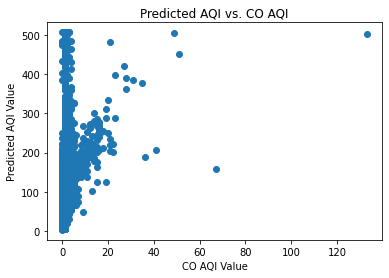

In [44]:
# Create a scatter plot of the predicted AQI values against the CO AQI values
plt.scatter(X_new['CO AQI Value'], predictions)
plt.xlabel('CO AQI Value')
plt.ylabel('Predicted AQI Value')
plt.title('Predicted AQI vs. CO AQI')
plt.show()

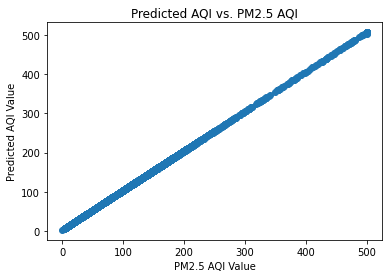

In [45]:
plt.scatter(X_new['PM2.5 AQI Value'], predictions)
plt.xlabel('PM2.5 AQI Value')
plt.ylabel('Predicted AQI Value')
plt.title('Predicted AQI vs. PM2.5 AQI')
plt.show()